# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow opencv-python mediapipe==0.10.11 scikit-learn matplotlib


[notice] A new release of pip available: 22.3 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

c:\VSCode Project\sign-language\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic #Holistic model
mp_drawing = mp.solutions.drawing_utils #Drawing utilities

In [5]:
def mediapipe_detection(image, model):
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #COLOR CONVERSION BGR 2 RGB
  image.flags.writeable = False                  #Image is no longer writeable
  results = model.process(image)                 #Make Prediction
  image.flags.writeable = True                   #Image is now writeable
  image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) #COLOR CONVERSION RGB 2 BGR
  return image,results

In [ ]:
green = mp_drawing.DrawingSpec(color=(0,255,0), thickness=2, circle_radius=2)
def draw_landmarks(image,results):
  mp_drawing.draw_landmarks(image,results.face_landmarks, mp_holistic.FACE_CONNECTIONS) #Draw face connections
  mp_drawing.draw_landmarks(image,results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) #Draw pose connections
  mp_drawing.draw_landmarks(image,results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw Left hand connections
  mp_drawing.draw_landmarks(image,results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) #Draw Right hand connections

In [7]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [8]:
mp_drawing.draw_landmarks??

Signature:
mp_drawing.draw_landmarks(
    image: numpy.ndarray,
    landmark_list: mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[int, mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(0, 0, 255), thickness=2, circle_radius=2),
    connection_drawing_spec: Union[mediapipe.python.solutions.drawing_utils.DrawingSpec, Mapping[Tuple[int, int], mediapipe.python.solutions.drawing_utils.DrawingSpec]] = DrawingSpec(color=(224, 224, 224), thickness=2, circle_radius=2),
    is_drawing_landmarks: bool = True,
)
Source:   
def draw_landmarks(
    image: np.ndarray,
    landmark_list: landmark_pb2.NormalizedLandmarkList,
    connections: Optional[List[Tuple[int, int]]] = None,
    landmark_drawing_spec: Union[DrawingSpec,
                                 Mapping[int, DrawingSpec]] = DrawingSpec(
          

In [10]:
mp_holistic.FACE_CONNECTIONS = mp.solutions.face_mesh.FACEMESH_TESSELATION
mp_holistic.POSE_CONNECTIONS = mp.solutions.pose.POSE_CONNECTIONS
mp_holistic.HAND_CONNECTIONS = mp.solutions.hands.HAND_CONNECTIONS

In [ ]:
cap = cv2.VideoCapture(0)
#Set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
      
      #Read feed
      ret,frame = cap.read()
      
      #Make detections
      image, results = mediapipe_detection(frame,holistic)
      print(results)
      
      #Draw Landmarks
      draw_landmarks(image, results)
      
      #Show to screen
      cv2.imshow('OpenCV Feed', image)
      
      #Break gracefully
      if cv2.waitKey(10) & 0xFF == ord('q'):
        break
  
cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [28]:
len(results.left_hand_landmarks.landmark)

21

In [35]:
results

mediapipe.python.solution_base.SolutionOutputs

In [40]:
draw_landmarks(frame,results)

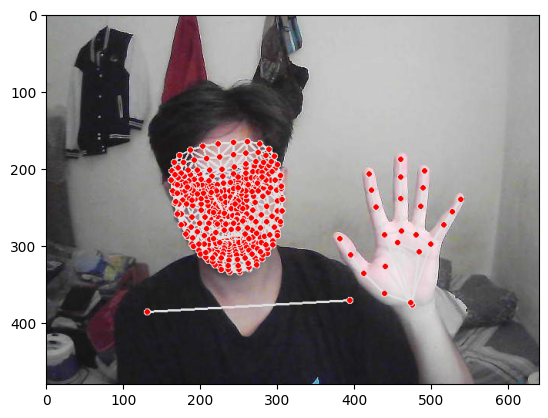

In [41]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

# 4. Setup Folders for Collection

# 5. Collect Keypoints Values for Training and Testing

# 6. Preprocess Data and Create Labels and Features

# 7. Build and Train LSTM Neural Network

# 8. Make Predictions

# 9. Save Weights

# 10. Evaluation using Confusion Matrix and Accuracy